In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_3d_graph
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

In [2]:
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('../data/PLdata_bh_34.mat', 34)
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('../data/PLdata_bh_53.mat', 53)
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('../data/PLdata_bh_64.mat', 64)

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('../data/PLdata_ma_34.mat', 34)
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('../data/PLdata_ma_53.mat', 53)
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('../data/PLdata_ma_64.mat', 64)

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)

<Bundang>


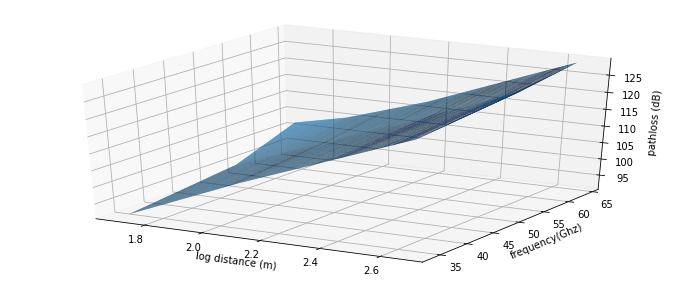

train_error(RMSE) : 7.21888108817689
validation_error(RMSE) : 7.343614877107953
test_error(RMSE) : 7.272289984169052
-----------------------------------------------------------------------------------------------


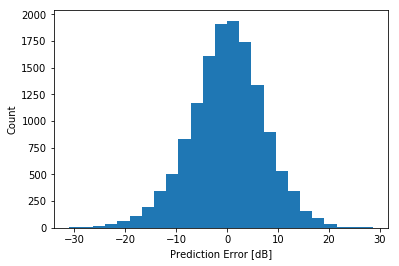

       Error(Noise) Distribution
count                13875.00000
mean                     0.00405
std                      7.21914
min                    -31.01952
25%                     -4.46250
50%                      0.20219
75%                      4.69809
max                     28.65682


In [19]:
model = mlp_regression(X_train_bh, y_train_bh, (60,60,60,60,60,60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_bh, y_train_bh)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
print("<Bundang>")
mlp_train_3d_graph(model,X_train_bh, y_train_bh)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_bh, y_train_bh)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_bh, y_val_bh)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_bh, y_test_bh)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_bh), y_train_bh)

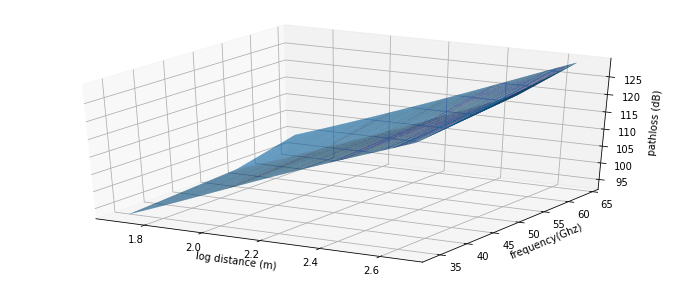

train_error(RMSE) : 7.2183438529528114
validation_error(RMSE) : 7.339754811500858
test_error(RMSE) : 7.2655689200965075
-----------------------------------------------------------------------------------------------


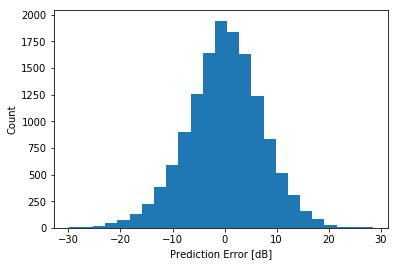

       Error(Noise) Distribution
count                13875.00000
mean                    -0.01151
std                      7.21859
min                    -29.91520
25%                     -4.46622
50%                      0.15353
75%                      4.75321
max                     28.52315


In [17]:
model = mlp_regression(X_train_bh, y_train_bh, (60,60,60,60,60,60), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_bh, y_train_bh)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_3d_graph(model,X_train_bh, y_train_bh)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_bh, y_train_bh)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_bh, y_val_bh)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_bh, y_test_bh)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_bh), y_train_bh)

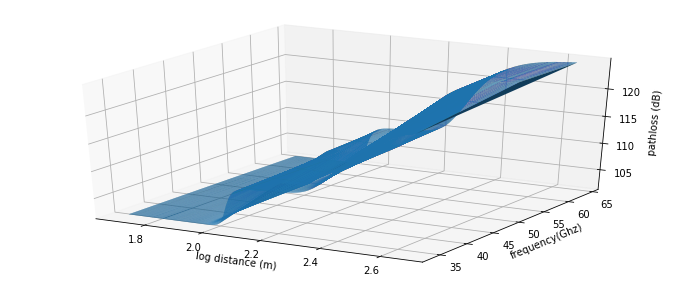

train_error(RMSE) : 7.375809310585742
validation_error(RMSE) : 7.403700031985212
test_error(RMSE) : 7.462714999984672
-----------------------------------------------------------------------------------------------


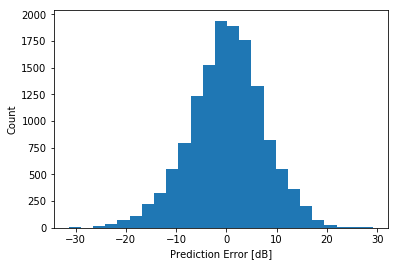

       Error(Noise) Distribution
count                13875.00000
mean                     0.06363
std                      7.37580
min                    -31.34037
25%                     -4.55735
50%                      0.26357
75%                      4.83745
max                     29.19738


In [16]:
model = mlp_regression(X_train_bh, y_train_bh, (60,60,60,60,60,60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_bh, y_train_bh)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_3d_graph(model,X_train_bh, y_train_bh)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_bh, y_train_bh)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_bh, y_val_bh)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_bh, y_test_bh)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_bh), y_train_bh)

<Mokdong>


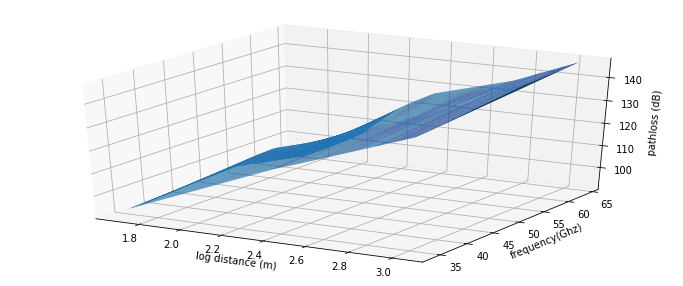

train_error(RMSE) : 6.963933974348213
validation_error(RMSE) : 6.869596104915928
test_error(RMSE) : 6.970562873073921
-----------------------------------------------------------------------------------------------


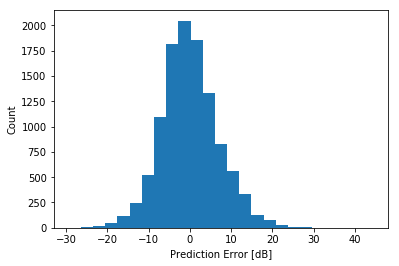

       Error(Noise) Distribution
count                11080.00000
mean                     0.00949
std                      6.96424
min                    -29.31907
25%                     -4.44531
50%                     -0.40937
75%                      4.20222
max                     44.38950


In [14]:
model = mlp_regression(X_train_ma, y_train_ma, (60,60,60,60,60,60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_ma, y_train_ma)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
print("<Mokdong>")
mlp_train_3d_graph(model,X_train_ma, y_train_ma)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_ma, y_train_ma)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_ma, y_val_ma)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_ma, y_test_ma)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_ma), y_train_ma)

<Mokdong>


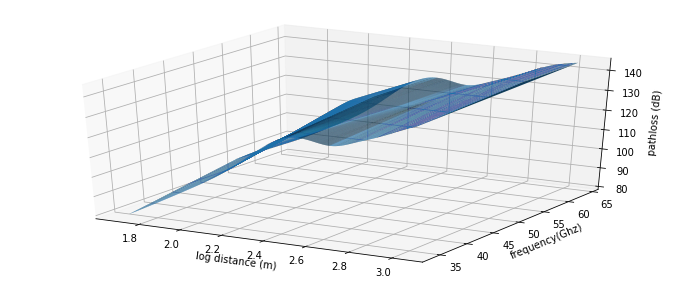

train_error(RMSE) : 6.305278287592529
validation_error(RMSE) : 6.272920956853226
test_error(RMSE) : 6.3632336381179275
-----------------------------------------------------------------------------------------------


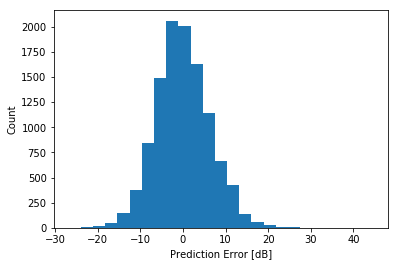

       Error(Noise) Distribution
count                11080.00000
mean                     0.00741
std                      6.30556
min                    -26.75658
25%                     -4.19230
50%                     -0.33418
75%                      3.99115
max                     44.62523


In [12]:
model = mlp_regression(X_train_ma, y_train_ma, (60,60,60,60,60,60), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_ma, y_train_ma)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
print("<Mokdong>")
mlp_train_3d_graph(model,X_train_ma, y_train_ma)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_ma, y_train_ma)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_ma, y_val_ma)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_ma, y_test_ma)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_ma), y_train_ma)

<Mokdong>


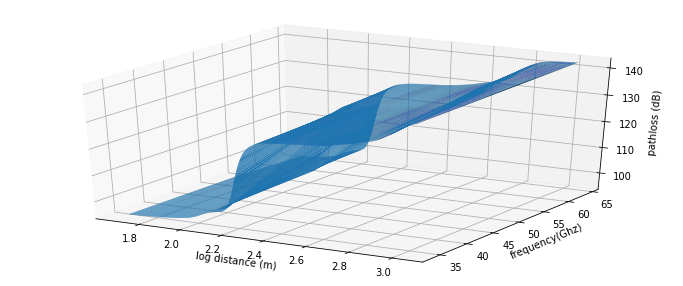

train_error(RMSE) : 6.712701168959049
validation_error(RMSE) : 6.775256035890689
test_error(RMSE) : 6.633349012779319
-----------------------------------------------------------------------------------------------


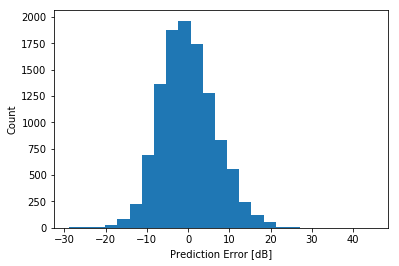

       Error(Noise) Distribution
count                11080.00000
mean                     0.00076
std                      6.71300
min                    -28.93258
25%                     -4.65352
50%                     -0.47379
75%                      4.19291
max                     44.90352


In [13]:
model = mlp_regression(X_train_ma, y_train_ma, (60,60,60,60,60,60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_ma, y_train_ma)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
print("<Mokdong>")
mlp_train_3d_graph(model,X_train_ma, y_train_ma)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_ma, y_train_ma)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_ma, y_val_ma)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_ma, y_test_ma)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_ma), y_train_ma)